# Titanic Survival Analysis
The data set that I've chosen to analyze in this project is [Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv), which was originally obtained from [the Kaggle website](https://www.kaggle.com/c/titanic/data).    

The question to be answered:  
**What factors made people more likely to survive?**

## The Data

In [293]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
%matplotlib inline

# Load the dataset
in_file = 'titanic-data.csv'
df = pd.read_csv(in_file)

print('Total number of samples in this dataset:', len(df))

# Print the first few entries of the Titanic data
df.head()

Total number of samples in this dataset: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)  


## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data.

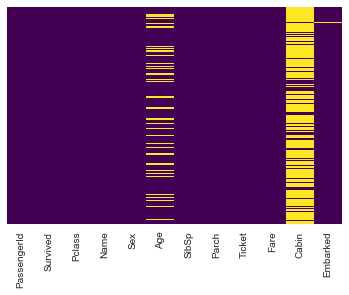

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [319]:
# Calculate percentage of missing Age data
df['Age'].isnull().value_counts(normalize=True).round(4)*100

False    80.13
True     19.87
Name: Age, dtype: float64

Each yellow line represents a missing value (NaN) in the corresponding feature. We can see that roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough and still can be useful in the analysis. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll ingore this feature in the following analysis. 

### Percentage of Survivors

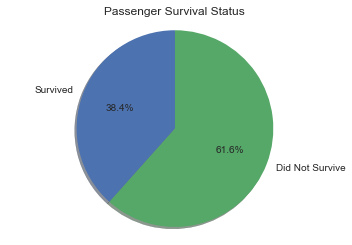

In [296]:
# Plot the proportion of survivors pie chart
plt.title('Passenger Survival Status')
plt.pie([len(df[df['Survived']==1]),len(df[df['Survived']==0])], shadow=True, startangle=90, autopct='%1.1f%%', 
        labels =['Survived','Did Not Survive']);
plt.axis('equal');

Among all these 891 passengers, only 38.4% survived and the rest of them did not survive. 

### Age Factor

First, we look at the age of the passengers.

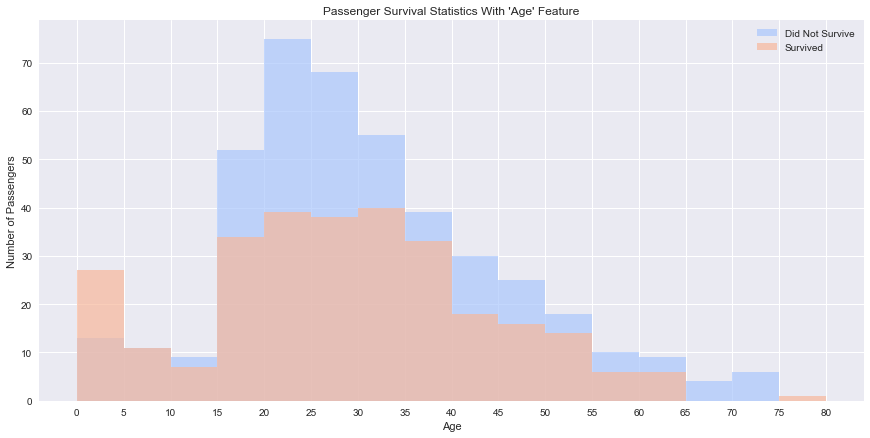

In [317]:
# Plot the Age data distribution related to survival
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Survived",
                  palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Age',bins=range(0,85,5),alpha=0.7).set(ylabel='Number of Passengers',
                                                             title = "Passenger Survival Statistics With 'Age' Feature",
                                                             xticks=np.arange(0,85,5));
plt.legend(['Did Not Survive','Survived'])

From the above plot, we can see that across all age range, the number of passengers who did not survive is generally greater than the number of passengers who survived, except for group of passengers who are under age of 10. 

This can be illustrated in details by comparing the number of survivors of these two different groups:

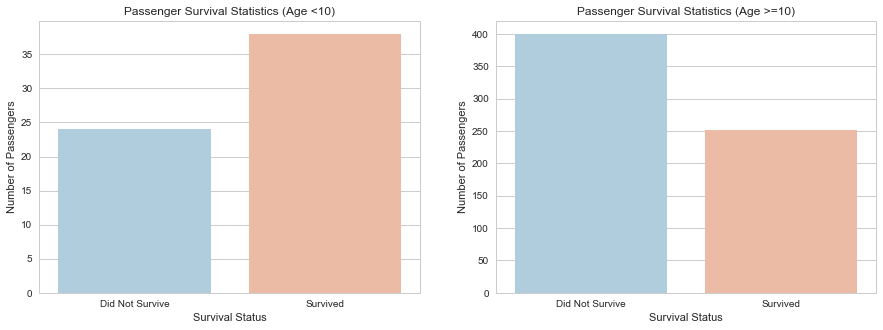

In [297]:
# Comparing the number of survival passengers with age <10 and passengers with age >=10

df_child = df[df['Age']<10]
df_adult = df[df['Age']>=10]

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
sns.countplot(x=df_child.Survived.map({0:'Did Not Survive',1:'Survived'}),
              data=df_child, palette='RdBu_r').set(ylabel='Number of Passengers',
                                                   xlabel = 'Survival Status',
                                                   title = "Passenger Survival Statistics (Age <10)");

plt.subplot(1, 2, 2)             
sns.set_style('whitegrid')
sns.countplot(x=df_adult.Survived.map({0:'Did Not Survive',1:'Survived'}),
              data=df_adult, palette='RdBu_r').set(ylabel='Number of Passengers',
                                                   xlabel = 'Survival Status',
                                                    title = "Passenger Survival Statistics (Age >=10)");

In [154]:
# Calculate the survival rate of children under 10
total_children = len(df[df['Age']<10])
survived_children = len(df[(df['Age']<10) & (df['Survived']==1)])

print("Survival rate of children passengers under age of 10: {:.2f}%".format(survived_children/total_children*100))

Survival rate of children passengers under age of 10: 61.29%


If you were a child under age of 10 on Titanic, there is a 61.29% of chance you would survive, which is greater than overall survival rate of 38.4%.

### Sex Factor

Next, we look at the sex of the passengers. 

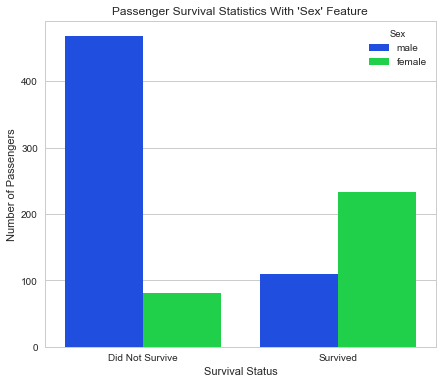

In [307]:
# Plot the number of survivors related with sex feature
plt.figure(figsize=(7,6))
sns.set_style('whitegrid')
sns.countplot(x=df.Survived.map({0:'Did Not Survive',1:'Survived'}),hue='Sex',
              data=df, palette='bright').set(ylabel='Number of Passengers',
                                            xlabel='Survival Status',
                                            title = "Passenger Survival Statistics With 'Sex' Feature");

At first glance, we can notice immediately that passengers who did not survive are mostly male. To quantify this observation, we calculate the survival rate of the male and female passengers.

In [312]:
# Calculate the survival rate of male and female passengers
survival_by_sex = df.groupby(['Survived', 'Sex']).size().unstack('Survived')
survival_rates_by_sex= survival_by_sex.divide(survival_by_sex.sum(axis=1),axis=0)*100
survival_rates_by_sex

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


Female passengers are more likely to survive compare with male passengers. If you were a female on Titanic, your chance of survive is 74.20%, much higher than 18.89% of male passengers.

### Ticket Class (Pclass) Factor

We also investigate ticket class (Pclass), which is a proxy for socio-economic status of passengers onboard. 

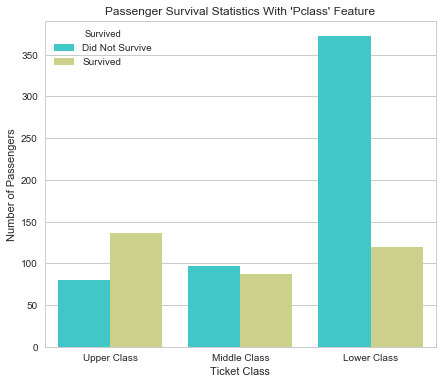

In [299]:
# Plot the number of survivors related with Pclass
plt.figure(figsize=(7,6))
sns.countplot(x=df.Pclass.map({1:'Upper Class', 2:'Middle Class', 3:'Lower Class'}),
              order=['Upper Class','Middle Class','Lower Class'],
              hue=df.Survived.map({0:'Did Not Survive',1:'Survived'}),
              data=df, palette='rainbow').set(ylabel='Number of Passengers',
                                             xlabel='Ticket Class',
                                             title = "Passenger Survival Statistics With 'Pclass' Feature");

There is difference in the chance of survival among these 3 classes.  In middle class, the number of death and alive are approximately equal. The passengers in upper class are more likely to survive. However, the number of passengers who did not survive is significantly higher in lower class. 

In [229]:
# Calculate the survival rates of passengers in different ticket class
survival_by_pclass = df.groupby(['Survived', 'Pclass']).size().unstack('Survived')
survival_rates_by_pclass = survival_by_pclass.divide(survival_by_pclass.sum(axis=1),axis=0)*100
survival_rates_by_pclass

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


Among these three classes, passengers in upper class had the highest survival rate of 62.96%. Lower class passengers had the least chance of survival with a death rate of about 75.76%.

### Combining Sex and Ticket Class Factors

From the above analysis, we know that being a female passenger *or* bought an upper class ticket had higher chance to survive. But what is the chance of survive if you are a female passenger in upper class? 

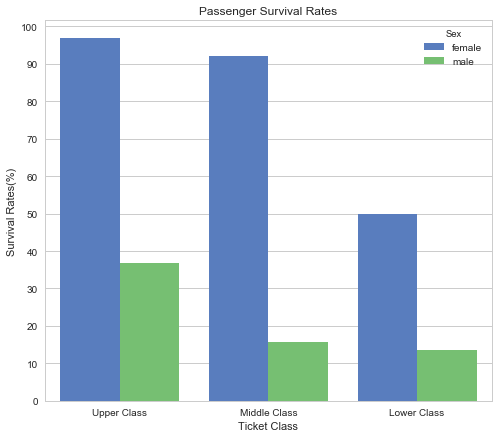

In [305]:
# Plot the number of survivors related with Pclass and Sex
plt.figure(figsize=(8,7))
table = df.groupby(['Pclass','Sex'], as_index =False)['Survived'].mean()
table['Survived'] = table['Survived']*100
sns.barplot(data = table, x=table.Pclass.map({1:'Upper Class', 2:'Middle Class', 3:'Lower Class'}),
            order=['Upper Class','Middle Class','Lower Class'],
            y = 'Survived', hue = 'Sex',palette='muted').set(ylabel='Survival Rates(%)',
                                             xlabel='Ticket Class',
                                             yticks=np.arange(0,101,10),                                                            
                                             title = "Passenger Survival Rates");

From the above table, we can immediately see that a female upper class passenger had almost 100% survival rate. Female passenger in middle class also had more than 90% chance of survival. Unfortunately, male passengers in middle and lower class had only less than 15% chance of survival. 

### Conclusion

The overall chances of survival for passengers on the Titanic was low at 38.4%. But based on the above investigation, passengers who were belong in the following groups had higher chance of survive in the tragedy:  
* Children who were under age of 10  
* Female passengers  
* Bought the upper class ticket

Among them, a female upper class passenger had almost 100% of survivial rate.  

Those observations is good enough to answer my question about the factors related to survival chance of passengers. For further research some statistical tests could be performed to support my conclusion. These factors could also be used as input features of machine learning model for predicting the survival of each passenger aboard the Titanic.